## GRUPO 6
##PEDRO GARCÍA SILGO
## JAVIER RODRIGUEZ GARCÍA

# INTRODUCCIÓN AL PROBLEMA
Crea  un  modelo  de  Red  de  Neuronas  Convolucionales  que  sea  capaz  de  reconocer  y clasificar  imágenes  de  ropa  en  sus  diferentes  tipologías.  Este  modelo  será  definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y que ya habéis utilizado para la práctica 1. 
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando (www.zalando.com),  una  tienda  de  moda  online  alemana  especializada  en  ventas  de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías.  Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución 
(28 x 28 píxeles): 

#Preparación

A continuación se importan todas las librerías necesarias para realizar la Red.


In [ ]:
#Se importan las librerías principales para operar y diseñar la red.
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

#Importamos las librerías para diseñar la parte convolucionar
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#Importamos los datos de Minst
from keras.utils.np_utils import to_categorical

from keras import losses
from keras import metrics

2.7.0


También nos garantizamos que tenemos la versión actualizada de Tensor Flow.

A continuación cargamos los datos de Zalando.

In [ ]:
#CARGAMOS EL CONJUNTO DE DATOS DE ZALANDO
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Y a cada una de las imágenes que hemos importado tienen asignada una etiqueta que indica qué prenda de ropa es cada imagen:

0.   Camiseta/Top
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

In [ ]:
clases = ['Camiseta/Top', 'Pantalón', 'Jersey', 'Vestido', 'Cazadora', 'Sandalia', 'Camisa', 'Zapatillas', 'Bolso', 'Bota']

Comprobamos que hemos cargado bien los datos con un ejemplo:

In [ ]:
print(train_images.shape)
# Vemos la matriz de la imagen número 1 (28x28)
print(train_images[5])
print(train_labels[5])

(60000, 28, 28)
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 20

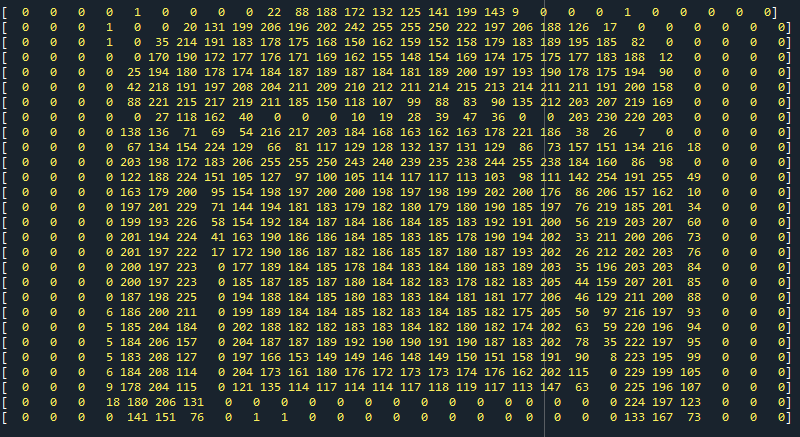

Esta es la primera imagen, lo que parece un jersey. La etiqueta es el 2, osea un jersey. (La imagen la hemos obtenido poniendo los datos originales en un script de python).

Pero, para que la red de neuronas funcione mejor, pasamos los valores de la imagen a valores entre 0 y 1. Además, como usaremos la función softmax, nos vendrá bien tener estos valores.

**Importante**. Para que la neurona aprenda, hay que camniar la forma de las imágenes, pero para el resto de comprobaciones (como pintar las prendas de ropa) usaremos las imágenes sin cambiar. Por lo tanto, crearemos dos variables de imagenes para test y otras dos para train:

In [ ]:
train_images0 = train_images #Imagenes sin cambiar
test_images0 = test_images

train_images0 = train_images0.astype('float32')
test_images0 = test_images0.astype('float32')

train_images0 = train_images0 / 255
test_images0 = test_images0 / 255

In [ ]:
train_images = train_images.reshape(60000, 28, 28, 1) #Imagenes cambiadas
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

Se podría dividir directamente entre 255.0 sin la necesidad de poner el astype para cambiar a coma flotante.

Esta es una imagen del jersey pintado con matliblob.

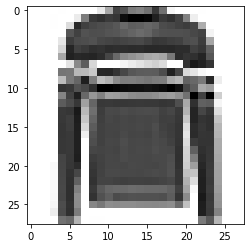

In [ ]:
imagen = train_images0[5]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

Para comprobar que también funciona con otras prendas, probaremos a pintar otras:
(Probaremos con la segunda tanda de 50)

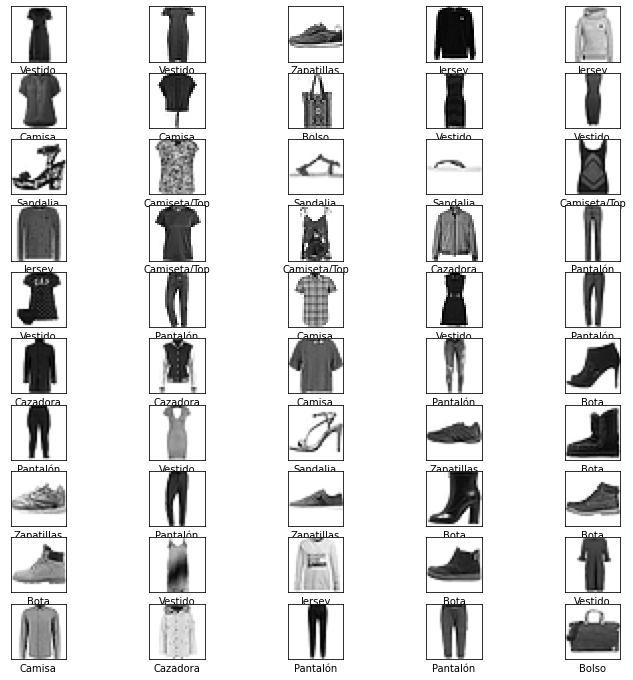

In [ ]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images0[i+50], cmap=plt.cm.binary)
    plt.xlabel(clases[train_labels[i+50]])
plt.show()

#Apartado 1

En el apartado 1, hemos diseñado las redes de neuronas convolucionales, las hemos analizado y hemos hecho un aconclusión acerca de los resultados.

A continuación dispondremos los datos de las neuronas para poder facilitar la construcción de la arquitectura de dichas neuronas:

In [ ]:
casos = 3
#Capa1
numero_neuronas1 = [32, 64, 64]
tamaño_ventana1 = [(5, 5), (7, 7), (7, 7)]
funcion_activacion1 = ['relu', 'relu', 'relu']
tamaño_imagen1 = [(28, 28, 1),(28, 28, 1),(28, 28, 1)]
pooling1 = [(2, 2),(2, 2),(2, 2)]

#Capa2
numero_neuronas2 = [64, 128, 128]
tamaño_ventana2 = [(5, 5), (3,3),(3,3)]
funcion_activacion2 = ['relu','relu','relu']
pooling2 = [(2, 2),(2, 2),(2, 2)]

#CapaFlatten
penultima_capa = [10, 65, 65]

ultima_capa=[10,10,10]
funcion_activacion3 = ['softmax','relu','relu']
funcion_activacion4 = ['softmax','softmax','softmax']
models = []

Y, con estos datos, creamos la red de neuronas convolucionales.

In [ ]:
for caso in range(casos):
  print('Caso', caso + 1)
  model = Sequential(name='Caso' + str(caso+1))
  model.add(Conv2D(numero_neuronas1[caso], tamaño_ventana1[caso], activation=funcion_activacion1[caso], input_shape=tamaño_imagen1[caso], name='Capa1'))
  model.add(MaxPooling2D(pooling1[caso],name='Pooling1'))

  model.add(Conv2D(numero_neuronas2[caso], tamaño_ventana2[caso], activation=funcion_activacion2[caso], name='Capa2'))
  model.add(MaxPooling2D(pooling2[caso], name='Pooling2'))


  model.add(Flatten(name='Flatten'))
  if caso > 0:
    model.add(Dense(penultima_capa[caso], activation=funcion_activacion3[caso], name= 'Dense'))
  model.add(Dense(ultima_capa[caso],activation=funcion_activacion4[caso],name='ultimacapa'))
  models.append(model)
  model.summary()
  print('\n\n')

Caso 1
Model: "Caso1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 Pooling1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 Pooling2 (MaxPooling2D)     (None, 4, 4, 64)          0         
                                                                 
 Flatten (Flatten)           (None, 1024)              0         
                                                                 
 ultimacapa (Dense)          (None, 10)                10250     
                                                                 
Total params: 62,346
Trainable params: 62,346
Non-trai

Aquí tambien empleamos el Flatten para que la información de las imágenes venga como un array y no como una matriz con los valores correspondientes.

Antes de poner a entrenar la red, comprobamos los datos que tenemos:

In [ ]:
print("train_images.shape:",train_images.shape)
print("test_images.shape:",test_images.shape)
print("train_labels.shape:",train_labels.shape)
print("test_labels.shape:",test_labels.shape)
print("train_labels:",len(train_labels))
print("test_labels:",len(test_labels))

train_images.shape: (60000, 28, 28, 1)
test_images.shape: (10000, 28, 28, 1)
train_labels.shape: (60000,)
test_labels.shape: (10000,)
train_labels: 60000
test_labels: 10000


Para poder realizar el entrenamiento, necesitamos tres valores: el optimizador, la funcion de pérdida y la métrica.

In [ ]:
funcion_perdida = ['sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy']
optimizador = ['sgd', 'sgd', 'adam']
metrica = ['accuracy','accuracy','accuracy']

epocas = [5, 5, 5]

Y a continuación se entrena cada red que hemos preparado. Recordemos que tenemos que usar las imágenes cambiadas, no las originales.

In [ ]:
history=[] #Esto lo uso más adelante para comparar 5 con 25 iteraciones

In [ ]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=metrica[caso])

In [ ]:
for caso in range(casos):
  print("Caso", caso+1)
  print("Neuronas Capa 1:", numero_neuronas1[caso])
  print("Funcion de activacion Capa 1:", funcion_activacion1[caso])
  print("Funcion de activacioncCapa 2:", funcion_activacion2[caso])
  print("Optimizador:", optimizador[caso])
  print("Funcion de perdida:", funcion_perdida[caso])
  print("Metrica:", metrica[caso])
  # print("-------------------------------------")
  history.append(models[caso].fit(train_images, train_labels, batch_size=64, epochs=epocas[caso], verbose=1, validation_split=0.2))
  print('\n\n')

Caso 1
Neuronas Capa 1: 32
Funcion de activacion Capa 1: relu
Funcion de activacioncCapa 2: relu
Optimizador: sgd
Funcion de perdida: sparse_categorical_crossentropy
Metrica: accuracy
Epoch 1/5
750/750 [==============================] - 19s 8ms/step - loss: 1.1090 - accuracy: 0.6240 - val_loss: 0.6781 - val_accuracy: 0.7454
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.6285 - accuracy: 0.7711 - val_loss: 0.5651 - val_accuracy: 0.7921
Epoch 3/5
750/750 [==============================] - 5s 7ms/step - loss: 0.5460 - accuracy: 0.8012 - val_loss: 0.5192 - val_accuracy: 0.8085
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.4992 - accuracy: 0.8212 - val_loss: 0.4787 - val_accuracy: 0.8274
Epoch 5/5
750/750 [==============================] - 5s 7ms/step - loss: 0.4668 - accuracy: 0.8352 - val_loss: 0.4576 - val_accuracy: 0.8393



Caso 2
Neuronas Capa 1: 64
Funcion de activacion Capa 1: relu
Funcion de activacioncCapa 2: relu
Optimizado

Hemos descubierto que usando el *validation_split* hace la comparación con datos de validación sin necesidad de crear valores para la validación. Ademas, el *batch_size* funciona mejor si el tamaño es una potencia de 2 y hemos probado con 64.

A continuación, procedemos a evaluar a nuestra red de neuronas.

In [ ]:
test_loss = []
test_acc = []
for caso in range(casos):
  print("Caso ", caso+1)
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])
  print("-------------")

Caso  1
313/313 [==============================] - 1s 4ms/step - loss: 0.4708 - accuracy: 0.8359
-------------
Caso  2
313/313 [==============================] - 1s 4ms/step - loss: 0.5217 - accuracy: 0.8132
-------------
Caso  3
313/313 [==============================] - 1s 4ms/step - loss: 0.3411 - accuracy: 0.8770
-------------


In [ ]:
for caso in range(casos):
  print("Caso ",caso+1)
  print("Perdida: ",test_loss[caso])
  print("Precison: ",test_acc[caso])
  print("-----------------")

Caso  1
Perdida:  0.4707789123058319
Precison:  0.8359000086784363
-----------------
Caso  2
Perdida:  0.5216974020004272
Precison:  0.8131999969482422
-----------------
Caso  3
Perdida:  0.3411250114440918
Precison:  0.8769999742507935
-----------------


Mirando estos datos, podemos decir que el modelo que mejor funciona es el **caso 3**. Esto puede deberse a que es el único modelo que ha usado el **optimizador adam**. También podemos ver que no ha habido sobreentrenmiento (para los tres casos), porque el valor de la precisión del test se asemeja al valor del entrenamiento con los datos de validación (1% de diferencia).

#Apartado 2 



Ahora, con las redes creadas, podemos ver el *model.summary()* de cada caso.

In [ ]:
for caso in range(casos):
  models[caso].summary() 
  print("\n\n\n")

Model: "Caso1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 Pooling1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 Pooling2 (MaxPooling2D)     (None, 4, 4, 64)          0         
                                                                 
 Flatten (Flatten)           (None, 1024)              0         
                                                                 
 ultimacapa (Dense)          (None, 10)                10250     
                                                                 
Total params: 62,346
Trainable params: 62,346
Non-trainable p

Según el *model.summary()*, podemos comparar tres modelos. 

Los casos 2 y 3 por lo que respecta a la arquitectura de la neurona, presentan el mismo modelo. En la primera y  segunda capa de la red neuronal utilizamos capas convolucionales con sus correspondientes MaxPooling que los usamos para el reconocimiento de cada imagen que después "aplanaremos" mediante el comando Flatten, es decir, unidimensionalizaremos la entrada multidimensional que usamos como transición a la capa completamente conectada mediante Dense.

En el caso 1 podemos encontrar diferencias con los otros casos ya que en la primera capa tiene un número menor de filtros y tamaño de cada ventana. Además, en la segunda capa presenta mayor tamaño de ventana pero menor número de filtros.

Es por ello, que en el resultado total de los parámetros observamos un valor mayor (también en cada capa) en los casos 2 y 3 que en el caso 1.


#Apartado 3

¿Qué pasaría si en el caso 1 utilizamos 25 épocas en vez de 5?

Para resolver esta cuestión, creamos un modelo igual al caso uno, pero separado para no tener ningún fallo. Además comprobaremos las pérdidas en una gráfica y las compararemos:

Ahora se crearan las gráficas para el caso original 1:

In [ ]:
history_dict = history[0].history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

[1.1089543104171753, 0.6284892559051514, 0.5460413694381714, 0.4991579055786133, 0.466770738363266]
[0.6240000128746033, 0.7710624933242798, 0.8011666536331177, 0.8211874961853027, 0.8351666927337646]
[0.6781033873558044, 0.5650821328163147, 0.5192077159881592, 0.4786826968193054, 0.45757144689559937]
[0.7454166412353516, 0.7920833230018616, 0.8084999918937683, 0.8274166584014893, 0.8393333554267883]


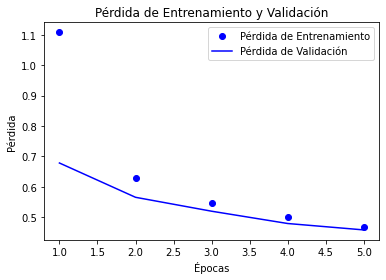

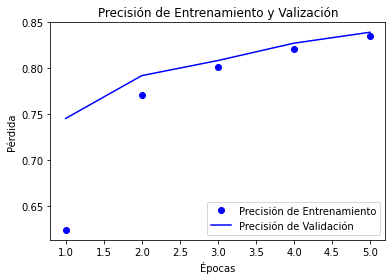

In [ ]:
acc = history[0].history['accuracy']
val_acc = history[0].history['val_accuracy']
loss = history[0].history['loss']
val_loss = history[0].history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.clf()   # Limpia la figura
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Ahora se harán las gráficas para el caso de las 25 iteraciones:

Para ello, volvemos a compilar los datos iniciales.

In [ ]:
historys13 = []
models13 = []

In [ ]:
for caso in range(1):
  print('Caso', caso + 1)
  model = Sequential(name='Caso' + str(caso+1))
  model.add(Conv2D(numero_neuronas1[caso], tamaño_ventana1[caso], activation=funcion_activacion1[caso], input_shape=tamaño_imagen1[caso], name='Capa1'))
  model.add(MaxPooling2D(pooling1[caso],name='Pooling1'))

  model.add(Conv2D(numero_neuronas2[caso], tamaño_ventana2[caso], activation=funcion_activacion2[caso], name='Capa2'))
  model.add(MaxPooling2D(pooling2[caso], name='Pooling2'))


  model.add(Flatten(name='Flatten'))
  model.add(Dense(penultima_capa[caso], activation=funcion_activacion3[caso], name= 'Dense'))
  models13.append(model)
  model.summary()
  print('\n\n')

Caso 1
Model: "Caso1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 Pooling1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 Pooling2 (MaxPooling2D)     (None, 4, 4, 64)          0         
                                                                 
 Flatten (Flatten)           (None, 1024)              0         
                                                                 
 Dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 62,346
Trainable params: 62,346
Non-trai

In [ ]:
for caso in range(1):
  models13[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=metrica[caso])

In [ ]:
for caso in range(1):
  print("Caso", caso+1,'´')
  print("Neuronas Capa 1:", numero_neuronas1[caso])
  print("Funcion de activacion Capa 1:", funcion_activacion1[caso])
  print("Funcion de activacioncCapa 2:", funcion_activacion2[caso])
  print("Optimizador:", optimizador[caso])
  print("Funcion de perdida:", funcion_perdida[caso])
  print("Metrica:", metrica[caso])
  print("-------------------------------------")
  historys13.append(models13[caso].fit(train_images, train_labels, batch_size=64, epochs=25, verbose=1, validation_split=0.2))
  print('\n\n')

Caso 1 ´
Neuronas Capa 1: 32
Funcion de activacion Capa 1: relu
Funcion de activacioncCapa 2: relu
Optimizador: sgd
Funcion de perdida: sparse_categorical_crossentropy
Metrica: accuracy
-------------------------------------
Epoch 1/25
750/750 [==============================] - 6s 7ms/step - loss: 1.0785 - accuracy: 0.6398 - val_loss: 0.6704 - val_accuracy: 0.7588
Epoch 2/25
750/750 [==============================] - 6s 8ms/step - loss: 0.6299 - accuracy: 0.7693 - val_loss: 0.5797 - val_accuracy: 0.7808
Epoch 3/25
750/750 [==============================] - 5s 7ms/step - loss: 0.5497 - accuracy: 0.8004 - val_loss: 0.5572 - val_accuracy: 0.7961
Epoch 4/25
750/750 [==============================] - 5s 7ms/step - loss: 0.5033 - accuracy: 0.8195 - val_loss: 0.4835 - val_accuracy: 0.8235
Epoch 5/25
750/750 [==============================] - 5s 7ms/step - loss: 0.4703 - accuracy: 0.8325 - val_loss: 0.4754 - val_accuracy: 0.8301
Epoch 6/25
750/750 [==============================] - 5s 7ms/step 

In [ ]:
history_dict13 = historys13[0].history
history_dict13.keys()
#print(history_dict13['loss'])
#print(history_dict13['accuracy'])
#print(history_dict13['val_loss'])
#print(history_dict13['val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

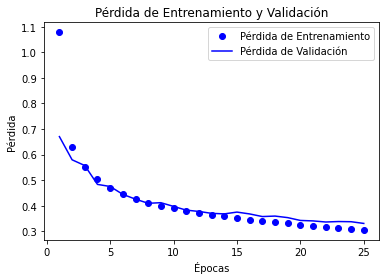

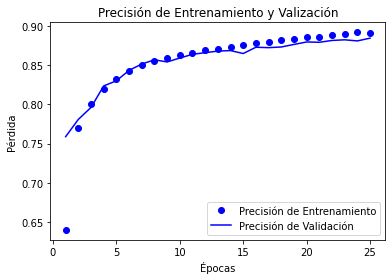

In [ ]:
acc = historys13[0].history['accuracy']
val_acc = historys13[0].history['val_accuracy']
loss = historys13[0].history['loss']
val_loss = historys13[0].history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.clf()   # Limpia la figura
acc_values = history_dict13['accuracy']
val_acc_values = history_dict13['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [ ]:
test_loss3 = []
test_acc3 = []
for caso in range(1):
  print("Caso ", caso+1)
  test_loss3.append(models13[caso].evaluate(test_images,  test_labels)[0])
  test_acc3.append(models13[caso].evaluate(test_images,  test_labels)[1])
  print("-------------")

Caso  1
313/313 [==============================] - 1s 4ms/step - loss: 0.3438 - accuracy: 0.8788
-------------


Mirando las gráficas obtenidas con el *history()* (fijándonos en la precisión y en la pérdida de los casos de 5 y 25 iteraciones) podemos deducir que **no hay sobreentrenamiento** (comparamos de nuevo los valores de prueba con los de test), lo cual es curioso porque no hay un número elevedo de neuronas. Esto se debe al haber utilizado redes neuronales convolucionales, porque intervienen más elementos (como el **padding** y la propia ventana que puede tener distintos valores). Si hubieramos usado una red normal, probablemente nos habríamos encontrado con un caso de sobreentrenamiento.

Pero, además, como no ha habido sobreentrenamiento, podemos elegir el caso de las 25 épocas

#Apartado 4

Se pide cambiar la función de activación del caso 1 de la función relu a la función tanh:

Como tenemos los datos del caso 1 arriba, lo inicializamos sin tener que reescribirlos. Lo único, podemos crear una variable que contenga la nueva función de activación.

In [ ]:
funcion_activacion14 = ['tanh']
funcion_activacion24 = ['tanh']
models14 = []

In [ ]:
for caso in range(1):
  print('Caso', caso + 1)
  model = Sequential(name='Caso' + str(caso+1))
  model.add(Conv2D(numero_neuronas1[caso], tamaño_ventana1[caso], activation=funcion_activacion14[caso], input_shape=tamaño_imagen1[caso], name='Capa1'))
  model.add(MaxPooling2D(pooling1[caso],name='Pooling1'))

  model.add(Conv2D(numero_neuronas2[caso], tamaño_ventana2[caso], activation=funcion_activacion24[caso], name='Capa2'))
  model.add(MaxPooling2D(pooling2[caso], name='Pooling2'))


  model.add(Flatten(name='Flatten'))
  model.add(Dense(penultima_capa[caso], activation=funcion_activacion3[caso], name= 'Dense'))
  models14.append(model)
  model.summary()
  print('\n\n')

Caso 1
Model: "Caso1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 Pooling1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 Pooling2 (MaxPooling2D)     (None, 4, 4, 64)          0         
                                                                 
 Flatten (Flatten)           (None, 1024)              0         
                                                                 
 Dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 62,346
Trainable params: 62,346
Non-trai

Compilamos nuevamente.

In [ ]:
for caso in range(1):
  models14[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=metrica[caso])

Y entrenamos la red.

In [ ]:
for caso in range(1):
  print("Caso", caso+1)
  print("Neuronas Capa 1:", numero_neuronas1[caso])
  print("Funcion de activacion Capa 1:", funcion_activacion14[caso])
  print("Funcion de activacioncCapa 2:", funcion_activacion24[caso])
  print("Optimizador:", optimizador[caso])
  print("Funcion de perdida:", funcion_perdida[caso])
  print("Metrica:", metrica[caso])
  # print("-------------------------------------")
  models14[caso].fit(train_images, train_labels, batch_size=64, epochs=epocas[caso], verbose=1, validation_split=0.2)
  print('\n\n')

Caso 1
Neuronas Capa 1: 32
Funcion de activacion Capa 1: tanh
Funcion de activacioncCapa 2: tanh
Optimizador: sgd
Funcion de perdida: sparse_categorical_crossentropy
Metrica: accuracy
Epoch 1/5
750/750 [==============================] - 6s 7ms/step - loss: 1.0326 - accuracy: 0.6621 - val_loss: 0.6773 - val_accuracy: 0.7515
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.6314 - accuracy: 0.7650 - val_loss: 0.5798 - val_accuracy: 0.7796
Epoch 3/5
750/750 [==============================] - 5s 7ms/step - loss: 0.5574 - accuracy: 0.7946 - val_loss: 0.5315 - val_accuracy: 0.8057
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.5131 - accuracy: 0.8146 - val_loss: 0.4962 - val_accuracy: 0.8198
Epoch 5/5
750/750 [==============================] - 5s 7ms/step - loss: 0.4817 - accuracy: 0.8278 - val_loss: 0.4684 - val_accuracy: 0.8327





Y por último, evaluamos lo obtenido.

In [ ]:
test_loss4 = []
test_acc4 = []
for caso in range(1):
  print("Caso ", caso+1)
  test_loss4.append(models14[caso].evaluate(test_images,  test_labels)[0])
  test_acc4.append(models14[caso].evaluate(test_images,  test_labels)[1])
  print("-------------")

Caso  1
313/313 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.8279
-------------


Recordemos que obtenemos en el caso original:

In [ ]:
print(test_loss[0])
print(test_acc[0])

0.4707789123058319
0.8359000086784363


Despues de haber compilado varias veces el programa, en casitodos los resultados el modelo con la función de activación **tanh funciona mejor** que la función relu. Probablemente se deba a que para valores entre 0 y uno, la función tanh devuelve valores más altos. Pero, después de este análisis, escogería la del propio apartado y no la original. 


#Apartado 5

Básicamente, cada vez que hemos compilado el programa, hemos hecho que vaya comparándose con los propios datos de prueba. Aparece en la parte de **validation_split** en cada *fit()*.

#Apartado 6  

Para este apartado se pide hacer predicciones. Como he explicado antes, para este caso emplearemos las imágenes que no han sido cambiadas con el *reshape()*. (Para hacer las predicciones si que usaremos las imagenes cambiadas)

In [ ]:
numero = 5

In [ ]:
predictions = []
for caso in range(casos):
  predictions.append(models[caso].predict(test_images))

In [ ]:
predictions[2][5]

array([1.2915775e-05, 9.9998462e-01, 5.1159321e-07, 3.8074913e-07,
       6.3816526e-07, 5.0861282e-10, 5.7058691e-07, 8.9941353e-12,
       4.8370566e-07, 2.5295972e-12], dtype=float32)

In [ ]:
for caso in range(casos):
  print("Prediccion Caso: ", caso + 1 , " : ", predictions[caso][numero])
  print("\n\n")

Prediccion Caso:  1  :  [1.9889594e-04 9.9971694e-01 2.2650017e-06 8.9205723e-06 5.0315586e-05
 1.6355708e-08 1.7308739e-05 6.0559219e-10 5.2357891e-06 2.6100937e-11]



Prediccion Caso:  2  :  [2.0464026e-05 9.9880540e-01 4.1436101e-06 2.9911907e-05 1.0935006e-03
 7.3814808e-06 3.8672286e-05 4.0964849e-09 4.3022445e-07 1.1544579e-09]



Prediccion Caso:  3  :  [1.2915775e-05 9.9998462e-01 5.1159321e-07 3.8074913e-07 6.3816526e-07
 5.0861282e-10 5.7058691e-07 8.9941353e-12 4.8370566e-07 2.5295972e-12]





Con las siguientes funciones podremos realizar las predicciones. Estas mostraran en negro la predicción correcta y la incorrecta en rojo:

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(clases[predicted_label],
                                100*np.max(predictions_array),
                                clases[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')



Predicciones Caso: 1 Figura: 5


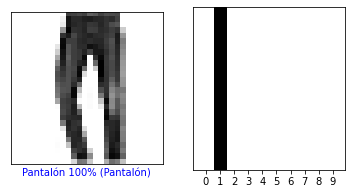




Predicciones Caso: 2 Figura: 5


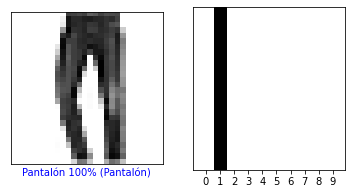




Predicciones Caso: 3 Figura: 5


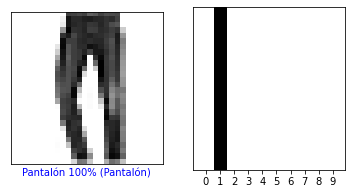

In [ ]:
def prediccion_caso_concreto(caso_concreto):
  for caso in range(casos):
    print("Predicciones Caso:", str(caso+1), "Figura:", caso_concreto)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(caso_concreto, predictions[caso][caso_concreto], test_labels, test_images0)
    plt.subplot(1,2,2)
    plot_value_array(caso_concreto, predictions[caso][caso_concreto],  test_labels)
    plt.show()
    print("\n\n")
prediccion_caso_concreto(numero)

El algoritmo en los casos 1 y 2 casi no acierta que es una cazadora. Pero en el tercer caso, está precticamente seguro de que es una cazadora.

#Apartado 7 

Predicciones Caso: 1 Figura: 0


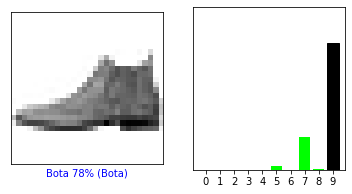




Predicciones Caso: 2 Figura: 0


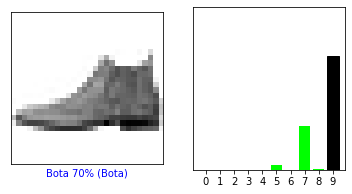




Predicciones Caso: 3 Figura: 0


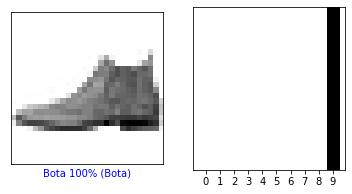




-------------------------------------



Predicciones Caso: 1 Figura: 1


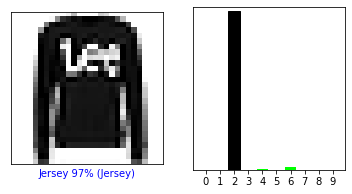




Predicciones Caso: 2 Figura: 1


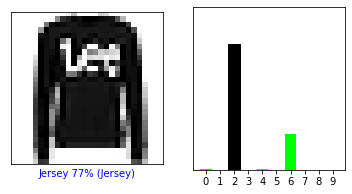




Predicciones Caso: 3 Figura: 1


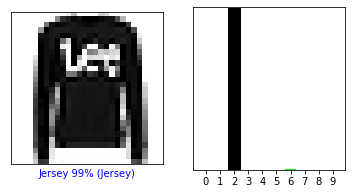




-------------------------------------



Predicciones Caso: 1 Figura: 2


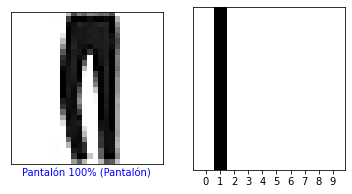




Predicciones Caso: 2 Figura: 2


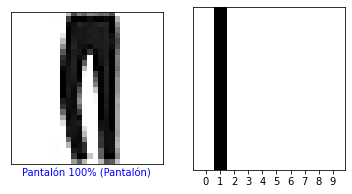




Predicciones Caso: 3 Figura: 2


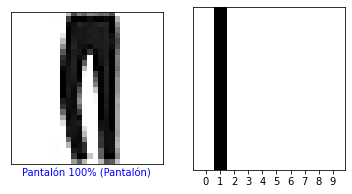




-------------------------------------



Predicciones Caso: 1 Figura: 3


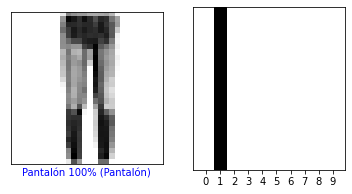




Predicciones Caso: 2 Figura: 3


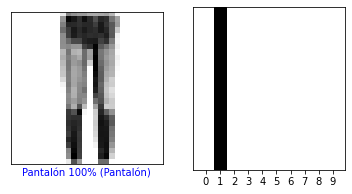




Predicciones Caso: 3 Figura: 3


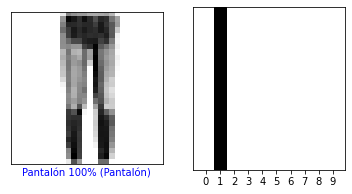




-------------------------------------



Predicciones Caso: 1 Figura: 4


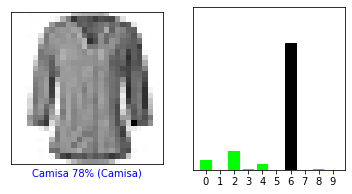




Predicciones Caso: 2 Figura: 4


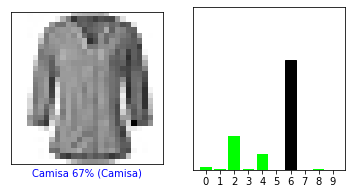




Predicciones Caso: 3 Figura: 4


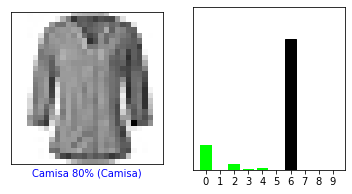




-------------------------------------



Predicciones Caso: 1 Figura: 5


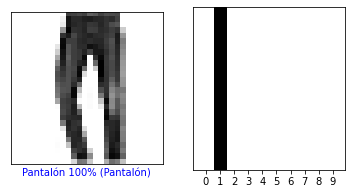




Predicciones Caso: 2 Figura: 5


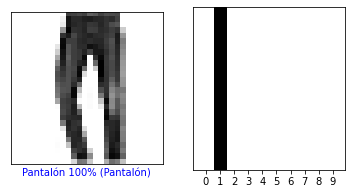




Predicciones Caso: 3 Figura: 5


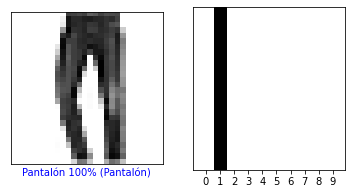




-------------------------------------



Predicciones Caso: 1 Figura: 6


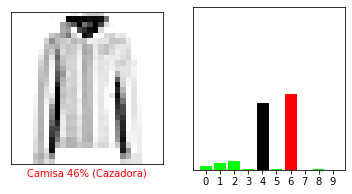




Predicciones Caso: 2 Figura: 6


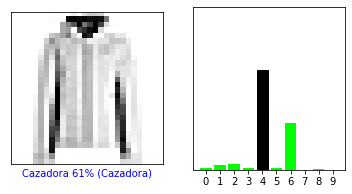




Predicciones Caso: 3 Figura: 6


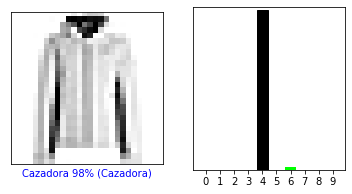




-------------------------------------



Predicciones Caso: 1 Figura: 7


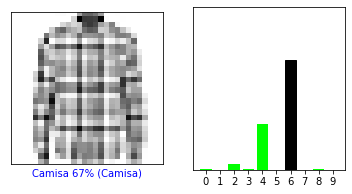




Predicciones Caso: 2 Figura: 7


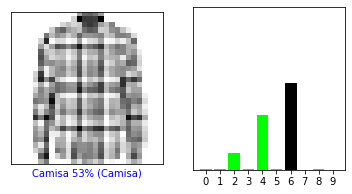




Predicciones Caso: 3 Figura: 7


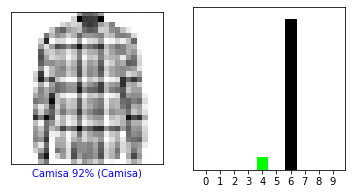




-------------------------------------



Predicciones Caso: 1 Figura: 8


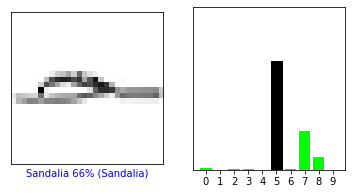




Predicciones Caso: 2 Figura: 8


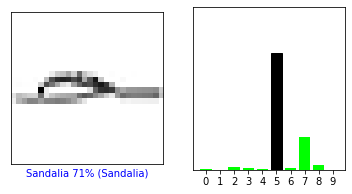




Predicciones Caso: 3 Figura: 8


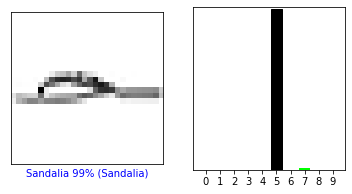




-------------------------------------



Predicciones Caso: 1 Figura: 9


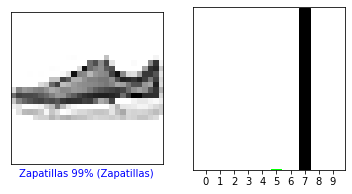




Predicciones Caso: 2 Figura: 9


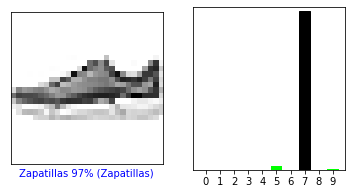




Predicciones Caso: 3 Figura: 9


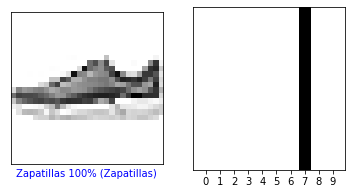




-------------------------------------



Predicciones Caso: 1 Figura: 10


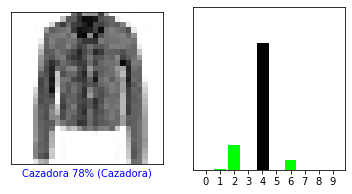




Predicciones Caso: 2 Figura: 10


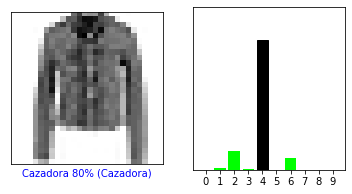




Predicciones Caso: 3 Figura: 10


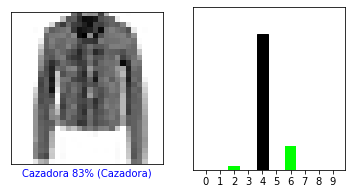




-------------------------------------



Predicciones Caso: 1 Figura: 11


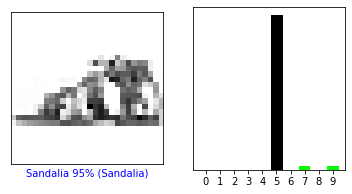




Predicciones Caso: 2 Figura: 11


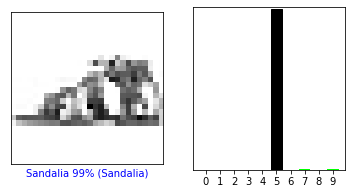




Predicciones Caso: 3 Figura: 11


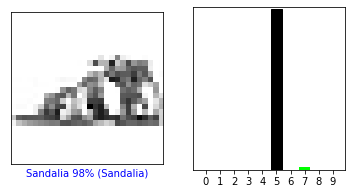




-------------------------------------



Predicciones Caso: 1 Figura: 12


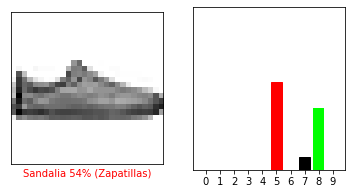




Predicciones Caso: 2 Figura: 12


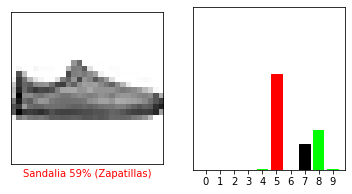




Predicciones Caso: 3 Figura: 12


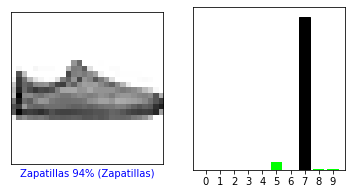




-------------------------------------



Predicciones Caso: 1 Figura: 13


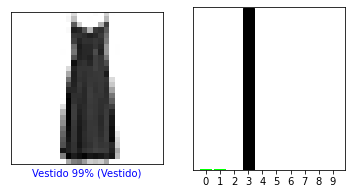




Predicciones Caso: 2 Figura: 13


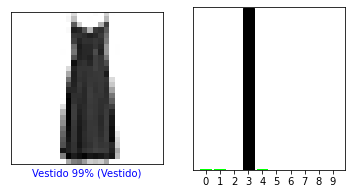




Predicciones Caso: 3 Figura: 13


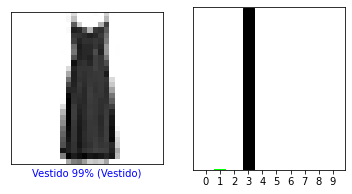




-------------------------------------





In [ ]:
for caso in range(14):
  prediccion_caso_concreto(caso)
  print("-------------------------------------")
  print("\n\n")


Podemos ver que los modelos aciertan bastante (en algunos casos casi por los pelos). Pero, podemos observar que en la penúltima figura, la de unas zapatillas, se equivocan el caso 1 y 2. Además, el 3 lo ha acertado con un 60%, tampoco es tanto. Podemos asumir que puede que estos modelos se comporten bien con casitodas las prendas (sobretodo el tercer modelo, el que usa adam) menos con las zapatillas.

#Apartado 8

En la primera práctica que hicimos, tuvimos que realizar 8 modelos, a destacar el 6 y el 8 por su alto rendimiento. Ambos tenían 512 y un optimizador rmsprop y podían alcanzar una precisión del 90% en un buen caso.

Comparando con esta, hemos visto que aunque hayamos usado menos neuronas y un optimizador distinto, podemos alcanzar una precisiómn parecida solo por el hecho de ser redes convolucionales.